In [109]:
import pandas as pd
import numpy as np

In [110]:
df = pd.read_excel(r"C:\Users\HP\Downloads\uber_rides_data.xlsx")

In [111]:
df

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [112]:
df.shape

(200000, 8)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


In [114]:
df = df.dropna()

In [116]:
df.shape

(199999, 8)

In [10]:
df.dropoff_longitude.isna().sum()

1

In [16]:
df.fare_amount.max()

499.0

In [19]:
df.pickup_datetime

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object

In [151]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

C:\Users\HP\AppData\Local\Temp\ipykernel_29048\1049735705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pickup_datetime = pd.to_datetime(df.pickup_datetime)


In [27]:
pd.DatetimeIndex(df.pickup_datetime[pd.DatetimeIndex(df.pickup_datetime).year == 2014]).month.value_counts()

3     2755
4     2704
5     2667
10    2665
1     2494
6     2491
2     2438
11    2404
9     2391
12    2383
7     2357
8     2219
Name: pickup_datetime, dtype: int64

In [28]:
2755+2494+2438

7687

In [137]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    res = R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 5)

In [138]:
distances = df.apply(lambda x: haversine(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']),axis = 1)

In [119]:
distances.median()

2.12

In [139]:
distances.value_counts()

0.00000    5632
0.00042      11
0.00028      11
0.00034      11
0.00008       9
           ... 
1.83733       1
1.50837       1
5.75705       1
3.05445       1
5.41778       1
Length: 164777, dtype: int64

In [141]:
df['distances'] = distances

C:\Users\HP\AppData\Local\Temp\ipykernel_29048\3528062285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distances'] = distances


In [142]:
df.fare_amount[df.distances == 0].mean()

11.585317826704546

In [143]:
df.distances[df.fare_amount == df.fare_amount.max()]

170081    0.00079
Name: distances, dtype: float64

In [136]:
df

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distances
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48
...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.11
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.88
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.85
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.54


In [144]:
df

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distances
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68332
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.45759
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.03638
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66168
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.47545
...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.11221
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.87505
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.85032
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.53972


In [154]:
df['day'] = df['pickup_datetime'].dt.day_name()

C:\Users\HP\AppData\Local\Temp\ipykernel_29048\3380926122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['pickup_datetime'].dt.day_name()


In [156]:
df['day_num'] = df['pickup_datetime'].dt.day_of_week

C:\Users\HP\AppData\Local\Temp\ipykernel_29048\3716019120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_num'] = df['pickup_datetime'].dt.day_of_week


In [148]:
import datetime as dt

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ride_id            199999 non-null  int64              
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   distances          199999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 19.3 MB


# Model building 

In [158]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distances,day,day_num
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68332,Thursday,3
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.45759,Friday,4
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.03638,Monday,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66168,Friday,4
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.47545,Thursday,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

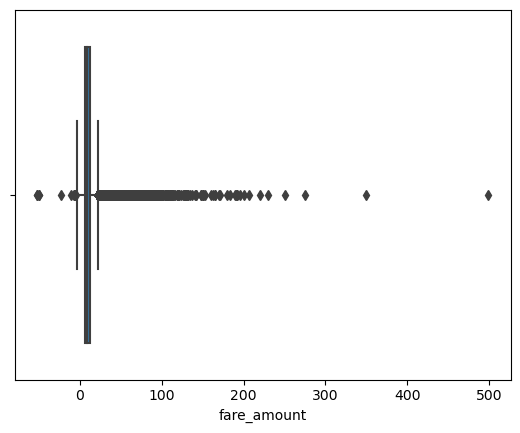

In [186]:
import seaborn as sns
sns.boxplot(df.fare_amount)

In [218]:
# remove outliers
from scipy import stats
df = df[stats.zscore(df.fare_amount).between(-2,2)]
df = df[stats.zscore(df.distances).between(-2,2)]

In [240]:
df.shape

(179174, 11)

In [221]:
# segrigate input and output
X = df[['passenger_count','day_num','distances']]
y = df.fare_amount

In [223]:
# split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(125421, 3) (53753, 3)
(125421,) (53753,)


In [224]:
# rescale
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_trans = pd.DataFrame(scalar.fit_transform(X_train),index=X_train.index,columns=X_train.columns)

In [225]:
X_train_trans

,passenger_count,day_num,distances
159900,-0.477527,-1.053412,0.057777
187408,0.222121,0.491273,1.293120
40655,-0.477527,-0.023622,-0.688217
29959,-0.477527,-1.568307,-0.897174
40775,2.321065,1.006168,-0.329278
...,...,...,...
10475,-0.477527,-0.023622,-0.236681
117888,-0.477527,-0.538517,-0.711488
104448,-0.477527,1.521063,2.340187
105767,-0.477527,-0.023622,-0.402535


In [226]:
y_train

159900    11.5
187408    11.5
40655      7.5
29959      3.7
40775      7.5
          ... 
10475      8.5
117888     7.0
104448    18.5
105767    13.7
92895      2.5
Name: fare_amount, Length: 125421, dtype: float64

In [227]:
X_test_trans = pd.DataFrame(scalar.transform(X_test),index=X_test.index,columns=X_test.columns)

In [228]:
X_test_trans

,passenger_count,day_num,distances
153823,-0.477527,0.491273,-0.924792
80109,0.921769,1.006168,0.500941
80791,-0.477527,1.521063,3.034595
2071,-0.477527,1.006168,2.078648
128815,0.921769,1.006168,-0.718067
...,...,...,...
199729,-0.477527,1.521063,1.489825
129915,-0.477527,0.491273,-0.237736
185557,-0.477527,-1.568307,-0.317555
134219,2.321065,-0.538517,1.021375


In [229]:
y_test  

153823     4.5
80109      6.5
80791     15.7
2071      16.1
128815     7.0
          ... 
199729    12.0
129915    12.5
185557     7.0
134219    16.0
181632     6.1
Name: fare_amount, Length: 53753, dtype: float64

In [230]:
# model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_trans,y_train)

LinearRegression()

In [231]:
y_test_pre = regressor.predict(X_test)

In [236]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pre) # accuracy

0.7313145518873915


In [237]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test)
metrics.r2_score(y_test,y_test_pre)

0.7534477055509743


In [238]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test)
metrics.r2_score(y_test,y_test_pre)

0.8546485900038912


In [239]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test)
metrics.r2_score(y_test,y_test_pre)

0.7946485900038912


### RandomForestRegressor is working better among all the models